# Exploratory Data Analysis of ORIGA and DRISHTI datasets

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Load dataset

In [3]:
def get_paths(directory):
    return [os.path.join(directory, name) for name in os.listdir(directory)]


image_paths = sorted([
    *get_paths('../data/ORIGA/TrainImages'),
    *get_paths('../data/ORIGA/TestImages'),
    *get_paths('../data/DRISHTI/TrainImages'),
    *get_paths('../data/DRISHTI/TestImages'),
])

mask_paths = sorted([
    *get_paths('../data/ORIGA/TrainMasks'),
    *get_paths('../data/ORIGA/TestMasks'),
    *get_paths('../data/DRISHTI/TrainMasks'),
    *get_paths('../data/DRISHTI/TestMasks'),
])

df = []
for image_path, mask_path in zip(image_paths, mask_paths):
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)

    bg_count = (mask == 0).sum()
    od_count = (mask == 1).sum()
    oc_count = (mask == 2).sum()

    bg_percent = bg_count / mask.size
    od_percent = od_count / mask.size
    oc_percent = oc_count / mask.size

    df.append({
        'image_path': image_path,
        'mask_path': mask_path,
        'image_shape': image.shape,
        'mask_shape': mask.shape,
        'image_dtype': image.dtype,
        'mask_dtype': mask.dtype,
        'image_min': image.min(),
        'mask_min': mask.min(),
        'image_max': image.max(),
        'mask_max': mask.max(),
        'image_mean': image.mean(),
        'mask_mean': mask.mean(),
        'image_std': image.std(),
        'mask_std': mask.std(),
        'bg_count': bg_count,
        'od_count': od_count,
        'oc_count': oc_count,
        'bg_percent': bg_percent,
        'od_percent': od_percent,
        'oc_percent': oc_percent,
    })

df = pd.DataFrame(df)
df.head(10)

,image_path,mask_path,image_shape,mask_shape,image_dtype,mask_dtype,image_min,mask_min,image_max,mask_max,image_mean,mask_mean,image_std,mask_std,bg_count,od_count,oc_count,bg_percent,od_percent,oc_percent
0,../data/DRISHTI/TestImages\drishtiGS_001.png,../data/DRISHTI/TestMasks\drishtiGS_001.png,"(2049, 2049, 3)","(2049, 2049)",uint8,uint8,0,0,239,2,39.514956,0.068425,42.177678,0.343575,4025114,59299,113988,0.958725,0.014124,0.027150
1,../data/DRISHTI/TestImages\drishtiGS_003.png,../data/DRISHTI/TestMasks\drishtiGS_003.png,"(2047, 2047, 3)","(2047, 2047)",uint8,uint8,0,0,164,2,25.312485,0.041160,25.675682,0.264006,4081079,45789,63341,0.973956,0.010928,0.015116
2,../data/DRISHTI/TestImages\drishtiGS_005.png,../data/DRISHTI/TestMasks\drishtiGS_005.png,"(2047, 2047, 3)","(2047, 2047)",uint8,uint8,0,0,228,2,34.003083,0.078920,40.766341,0.370188,3994332,61062,134815,0.953254,0.014573,0.032174
3,../data/DRISHTI/TestImages\drishtiGS_006.png,../data/DRISHTI/TestMasks\drishtiGS_006.png,"(2047, 2048, 3)","(2047, 2048)",uint8,uint8,0,0,200,2,33.703110,0.049297,38.860481,0.276342,4047422,83002,61832,0.965452,0.019799,0.014749
4,../data/DRISHTI/TestImages\drishtiGS_007.png,../data/DRISHTI/TestMasks\drishtiGS_007.png,"(2049, 2049, 3)","(2049, 2049)",uint8,uint8,0,0,255,2,58.438077,0.059085,59.143707,0.317739,4045567,57606,95228,0.963597,0.013721,0.022682
5,../data/DRISHTI/TestImages\drishtiGS_009.png,../data/DRISHTI/TestMasks\drishtiGS_009.png,"(2048, 2048, 3)","(2048, 2048)",uint8,uint8,0,0,188,2,32.999843,0.033334,30.329819,0.217448,4086079,76639,31586,0.974197,0.018272,0.007531
6,../data/DRISHTI/TestImages\drishtiGS_011.png,../data/DRISHTI/TestMasks\drishtiGS_011.png,"(2048, 2049, 3)","(2048, 2049)",uint8,uint8,0,0,215,2,44.554957,0.036668,47.141542,0.255083,4104891,29052,62409,0.978205,0.006923,0.014872
7,../data/DRISHTI/TestImages\drishtiGS_013.png,../data/DRISHTI/TestMasks\drishtiGS_013.png,"(2463, 2463, 3)","(2463, 2463)",uint8,uint8,0,0,168,2,14.123852,0.029716,22.859412,0.219639,5944973,62526,58870,0.979989,0.010307,0.009704
8,../data/DRISHTI/TestImages\drishtiGS_014.png,../data/DRISHTI/TestMasks\drishtiGS_014.png,"(2048, 2048, 3)","(2048, 2048)",uint8,uint8,0,0,221,2,42.474689,0.049188,41.749786,0.295344,4072844,36610,84850,0.971042,0.008729,0.020230
9,../data/DRISHTI/TestImages\drishtiGS_019.png,../data/DRISHTI/TestMasks\drishtiGS_019.png,"(2048, 2049, 3)","(2048, 2049)",uint8,uint8,0,0,255,2,48.420011,0.064598,47.875696,0.336719,4036381,48864,111107,0.961879,0.011644,0.026477


## Image Resolution Analysis

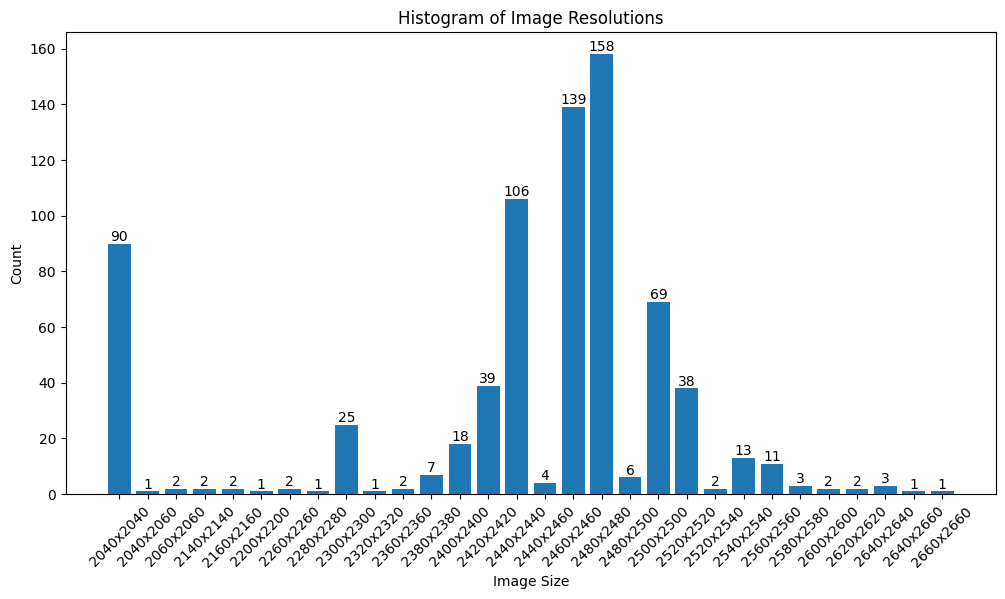

In [4]:
# Get the unique image sizes and their counts
shapes = df['image_shape'].tolist()
# Round shapes to nearest multiple of k
k = 20
shapes = [(round(s[0] / k) * k, round(s[1] / k) * k) for s in shapes]
# Get unique shapes and their counts
shapes, counts = np.unique(np.array(shapes), axis=0, return_counts=True)

# Plot the histogram
size_labels = [f'{s[0]}x{s[1]}' for s in shapes]
plt.figure(figsize=(12, 6))
bars = plt.bar(size_labels, counts)
plt.xlabel('Image Size')
plt.ylabel('Count')
plt.title('Histogram of Image Resolutions')
plt.xticks(rotation=45)

# Add count labels to each bar
for bar, value in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, value, ha='center', va='bottom')
plt.show()

## Class Imbalance Analysis

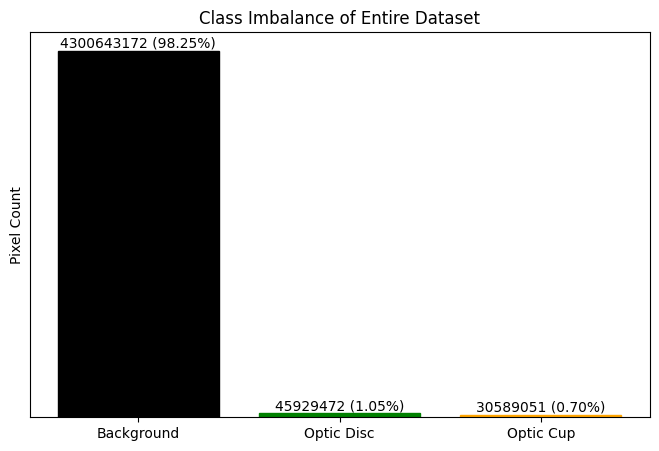

In [5]:
CLASS_NAMES = ['Background', 'Optic Disc', 'Optic Cup']
CLASS_COLORS = ['black', 'green', 'orange']

dataset_stats = {
    'Background': df['bg_count'].sum(),
    'Optic Disc': df['od_count'].sum(),
    'Optic Cup': df['oc_count'].sum(),
}

# Plot the histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(dataset_stats.keys(), dataset_stats.values())
plt.ylabel('Pixel Count')
plt.title('Class Imbalance of Entire Dataset')
plt.xticks(list(dataset_stats.keys()), CLASS_NAMES)
plt.yticks([])

# Add count labels to each bar with percentage
total = sum(dataset_stats.values())
for bar, value in zip(bars, dataset_stats.values()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{value} ({value / total * 100:.2f}%)',
             ha='center', va='bottom')

# Add color to each bar
for bar, color in zip(bars, CLASS_COLORS):
    bar.set_color(color)
plt.show()
